In [1]:
import pandas as pd

In [2]:
historical_data_path = 'historical_data.csv'
fear_greed_path = 'fear_greed_index.csv'

In [3]:
# Load the datasets
try:
    df_trader = pd.read_csv(historical_data_path)
    df_sentiment = pd.read_csv(fear_greed_path)
    print("Datasets loaded successfully!")
except FileNotFoundError:
    print("Error: Make sure 'historical_data.csv' and 'fear_greed_index.csv' are in the same directory.")
    # Exit or provide instructions to the user to place the files correctly
    exit()

Datasets loaded successfully!


In [5]:
df_trader.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
df_trader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
df_trader.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

In [8]:
df_sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [9]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [10]:
df_sentiment.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

### Date/Time Preprocessing

In [13]:
# Convert 'Timestamp IST' in df_trader to datetime and then extract the date
df_trader['Date'] = pd.to_datetime(df_trader['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

# Convert 'date' in df_sentiment to datetime
df_sentiment['Date'] = pd.to_datetime(df_sentiment['date'], format='%Y-%m-%d').dt.date

In [15]:
df_trader['Date'].dtype

dtype('O')

In [16]:
df_sentiment['Date'].dtype

dtype('O')

In [17]:
df_trader[['Timestamp IST', 'Date']].head()

,Timestamp IST,Date
0,02-12-2024 22:50,2024-12-02
1,02-12-2024 22:50,2024-12-02
2,02-12-2024 22:50,2024-12-02
3,02-12-2024 22:50,2024-12-02
4,02-12-2024 22:50,2024-12-02


In [18]:
df_sentiment[['date', 'Date']].head()

,date,Date
0,2018-02-01,2018-02-01
1,2018-02-02,2018-02-02
2,2018-02-03,2018-02-03
3,2018-02-04,2018-02-04
4,2018-02-05,2018-02-05


### Data Merging

In [19]:
# Merge the datasets on the 'Date' column
df_merged = pd.merge(df_trader, df_sentiment[['Date', 'classification', 'value']], on='Date', how='left')

In [20]:
df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed,80.0


In [21]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
 16  Date              21

In [22]:
print(df_merged[['classification', 'value']].isnull().sum())

classification    6
value             6
dtype: int64


In [23]:
initial_rows = len(df_merged)
df_merged.dropna(subset=['classification', 'value'], inplace=True)
rows_after_drop = len(df_merged)

In [24]:
print(f"Dropped {initial_rows - rows_after_drop} rows with missing sentiment data.")
print(f"Remaining rows in df_merged: {rows_after_drop}")

Dropped 6 rows with missing sentiment data.
Remaining rows in df_merged: 211218


In [25]:
# List of columns that should be numeric for calculations
numeric_cols_for_analysis = [
    'Execution Price',
    'Size Tokens',
    'Size USD',
    'Closed PnL',
    'Fee',
    'value' # The numeric value from the Fear & Greed Index
]


In [26]:
df_merged[numeric_cols_for_analysis].info()

<class 'pandas.core.frame.DataFrame'>
Index: 211218 entries, 0 to 211223
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Execution Price  211218 non-null  float64
 1   Size Tokens      211218 non-null  float64
 2   Size USD         211218 non-null  float64
 3   Closed PnL       211218 non-null  float64
 4   Fee              211218 non-null  float64
 5   value            211218 non-null  float64
dtypes: float64(6)
memory usage: 11.3 MB


In [27]:
# Iterate through the columns and convert them to numeric
for col in numeric_cols_for_analysis:
    if col in df_merged.columns: # Check if the column exists in the DataFrame
        # pd.to_numeric will attempt to convert, and 'errors='coerce'' will
        # turn any unconvertible values into NaN (Not a Number).
        df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')
    else:
        print(f"Warning: Column '{col}' not found in df_merged.")


In [28]:
df_merged[numeric_cols_for_analysis].info()

<class 'pandas.core.frame.DataFrame'>
Index: 211218 entries, 0 to 211223
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Execution Price  211218 non-null  float64
 1   Size Tokens      211218 non-null  float64
 2   Size USD         211218 non-null  float64
 3   Closed PnL       211218 non-null  float64
 4   Fee              211218 non-null  float64
 5   value            211218 non-null  float64
dtypes: float64(6)
memory usage: 11.3 MB


In [29]:
df_merged[numeric_cols_for_analysis].isnull().sum()

Execution Price    0
Size Tokens        0
Size USD           0
Closed PnL         0
Fee                0
value              0
dtype: int64

In [33]:
# For example, if a trade has no valid 'Closed PnL', it's hard to analyze its performance.
critical_numeric_for_dropna = ['Closed PnL', 'value']
initial_rows_after_sentiment_drop = len(df_merged) # Use the current length after sentiment drop
df_merged.dropna(subset=critical_numeric_for_dropna, inplace=True)
rows_after_numeric_dropna = len(df_merged)

if (initial_rows_after_sentiment_drop - rows_after_numeric_dropna) > 0:
    print(f"\nDropped {initial_rows_after_sentiment_drop - rows_after_numeric_dropna} rows where critical numeric columns became NaN after conversion.")
    print(f"Remaining rows in df_merged: {rows_after_numeric_dropna}")

### Feature Engineering

In [35]:
# Now, let's ensure it's a full datetime object for properties like .dt.day_name()
df_merged['Date_dt'] = pd.to_datetime(df_merged['Date'])
df_merged['Day_of_Week'] = df_merged['Date_dt'].dt.day_name()

# 2. Categorize Trades by Profit/Loss
df_merged['PnL_Category'] = df_merged['Closed PnL'].apply(
    lambda x: 'Profitable' if x > 0 else ('Loss-making' if x < 0 else 'Breakeven')
)

# 3. Calculate Normalized PnL (PnL per USD)
# Handle potential division by zero for 'Size USD' if it can be zero.
# If Size USD is 0, PnL_per_USD will be 0, as no capital was effectively risked/used.
df_merged['PnL_per_USD'] = df_merged.apply(
    lambda row: row['Closed PnL'] / row['Size USD'] if row['Size USD'] != 0 else 0,
    axis=1
)

# 4. Extract Hour of Day and categorize into segments (Optional but useful)
# Convert 'Timestamp IST' to datetime to get the hour
df_merged['Timestamp_full_dt'] = pd.to_datetime(df_merged['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
df_merged['Hour_of_Day'] = df_merged['Timestamp_full_dt'].dt.hour

# Define time segments
def get_time_segment(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

df_merged['Time_Segment'] = df_merged['Hour_of_Day'].apply(get_time_segment)

# Drop the temporary full datetime column if not needed later
df_merged.drop('Timestamp_full_dt', axis=1, inplace=True)


print("\n--- Engineered Features Preview (first 5 rows) ---")
print(df_merged[[
    'Date', 'Day_of_Week', 'Closed PnL', 'PnL_Category',
    'Size USD', 'PnL_per_USD', 'Hour_of_Day', 'Time_Segment'
]].head())


--- Engineered Features Preview (first 5 rows) ---
         Date Day_of_Week  Closed PnL PnL_Category  Size USD  PnL_per_USD  \
0  2024-12-02      Monday         0.0    Breakeven   7872.16          0.0   
1  2024-12-02      Monday         0.0    Breakeven    127.68          0.0   
2  2024-12-02      Monday         0.0    Breakeven   1150.63          0.0   
3  2024-12-02      Monday         0.0    Breakeven   1142.04          0.0   
4  2024-12-02      Monday         0.0    Breakeven     69.75          0.0   

   Hour_of_Day Time_Segment  
0           22      Evening  
1           22      Evening  
2           22      Evening  
3           22      Evening  
4           22      Evening  


In [36]:
print("\nDay of Week Distribution:")
print(df_merged['Day_of_Week'].value_counts())
print("\nPnL Category Distribution:")
print(df_merged['PnL_Category'].value_counts())
print("\nTime Segment Distribution:")
print(df_merged['Time_Segment'].value_counts())


Day of Week Distribution:
Day_of_Week
Wednesday    39736
Tuesday      36469
Monday       34421
Thursday     30439
Friday       29624
Saturday     20419
Sunday       20110
Name: count, dtype: int64

PnL Category Distribution:
PnL_Category
Breakeven      106816
Profitable      86863
Loss-making     17539
Name: count, dtype: int64

Time Segment Distribution:
Time_Segment
Evening      66140
Night        58589
Morning      44933
Afternoon    41556
Name: count, dtype: int64


In [38]:
df_merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Timestamp,Date,classification,value,Date_dt,Day_of_Week,PnL_Category,PnL_per_USD,Hour_of_Day,Time_Segment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,1.730000e+12,2024-12-02,Extreme Greed,80.0,2024-12-02,Monday,Breakeven,0.0,22,Evening
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,1.730000e+12,2024-12-02,Extreme Greed,80.0,2024-12-02,Monday,Breakeven,0.0,22,Evening
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,1.730000e+12,2024-12-02,Extreme Greed,80.0,2024-12-02,Monday,Breakeven,0.0,22,Evening
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,1.730000e+12,2024-12-02,Extreme Greed,80.0,2024-12-02,Monday,Breakeven,0.0,22,Evening
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,1.730000e+12,2024-12-02,Extreme Greed,80.0,2024-12-02,Monday,Breakeven,0.0,22,Evening


##  Exploratory Data Analysis (EDA)

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
# Create a figure to hold multiple plots
plt.figure(figsize=(18, 15))

<Figure size 1800x1500 with 0 Axes>

<Figure size 1800x1500 with 0 Axes>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Fear'),
  Text(1, 0, 'Greed'),
  Text(2, 0, 'Extreme Greed'),
  Text(3, 0, 'Neutral'),
  Text(4, 0, 'Extreme Fear')])

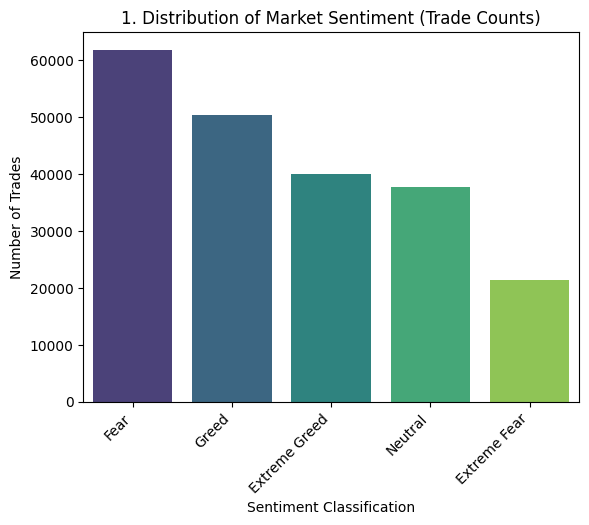

In [43]:
# --- 1. Distribution of Market Sentiment ---

sns.countplot(data=df_merged, x='classification', order=df_merged['classification'].value_counts().index, palette='viridis')
plt.title('1. Distribution of Market Sentiment (Trade Counts)')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45, ha='right')

C:\Users\pawan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


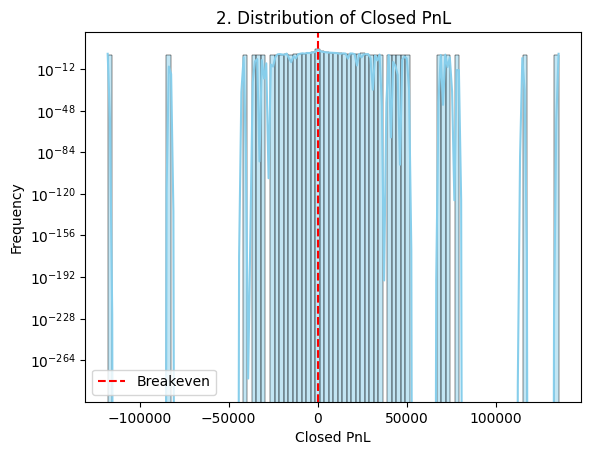

In [45]:
# --- 2. Overall Closed PnL Distribution ---

sns.histplot(df_merged['Closed PnL'], bins=100, kde=True, color='skyblue')
plt.title('2. Distribution of Closed PnL')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
# Using a log scale for y-axis is often useful if there are many small values and few large outliers
plt.yscale('log')
plt.axvline(0, color='red', linestyle='--', label='Breakeven')
plt.legend()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Extreme Greed'),
  Text(1, 0, 'Fear'),
  Text(2, 0, 'Greed'),
  Text(3, 0, 'Extreme Fear'),
  Text(4, 0, 'Neutral')])

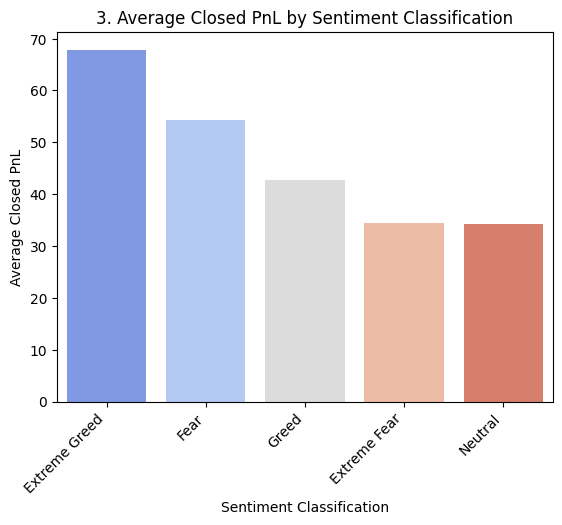

In [49]:
# --- 3. Average Closed PnL by Sentiment Classification ---
avg_pnl_by_sentiment = df_merged.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
sns.barplot(x=avg_pnl_by_sentiment.index, y=avg_pnl_by_sentiment.values, palette='coolwarm')
plt.title('3. Average Closed PnL by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Extreme Greed'),
  Text(1, 0, 'Fear'),
  Text(2, 0, 'Neutral'),
  Text(3, 0, 'Greed'),
  Text(4, 0, 'Extreme Fear')])

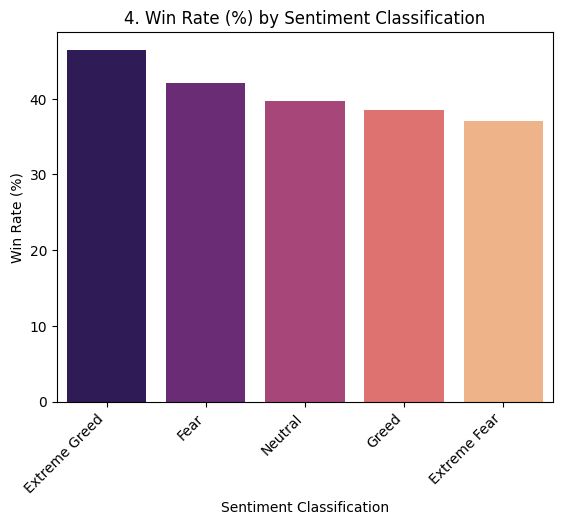

In [51]:
# --- 4. Win Rate (Percentage of Profitable Trades) by Sentiment Classification ---
total_trades_by_sentiment = df_merged.groupby('classification').size()
profitable_trades_by_sentiment = df_merged[df_merged['PnL_Category'] == 'Profitable'].groupby('classification').size()
# Calculate win rate, handling potential division by zero if a sentiment had no trades
win_rate_by_sentiment = (profitable_trades_by_sentiment / total_trades_by_sentiment) * 100
win_rate_by_sentiment = win_rate_by_sentiment.sort_values(ascending=False).fillna(0) # Fill NaN with 0 for cases with no profitable trades

sns.barplot(x=win_rate_by_sentiment.index, y=win_rate_by_sentiment.values, palette='magma')
plt.title('4. Win Rate (%) by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Win Rate (%)')
plt.xticks(rotation=45, ha='right')


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Extreme Greed'),
  Text(1, 0, 'Greed'),
  Text(2, 0, 'Fear'),
  Text(3, 0, 'Neutral'),
  Text(4, 0, 'Extreme Fear')])

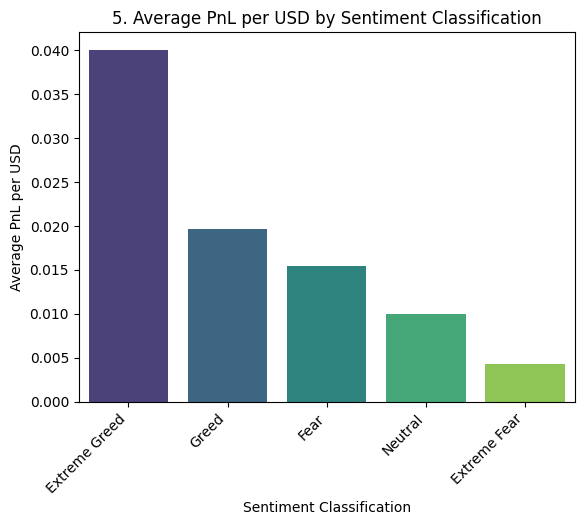

In [52]:
# --- 5. Average PnL per USD by Sentiment Classification ---
avg_pnl_per_usd_by_sentiment = df_merged.groupby('classification')['PnL_per_USD'].mean().sort_values(ascending=False)
sns.barplot(x=avg_pnl_per_usd_by_sentiment.index, y=avg_pnl_per_usd_by_sentiment.values, palette='viridis')
plt.title('5. Average PnL per USD by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average PnL per USD')
plt.xticks(rotation=45, ha='right')

In [62]:
# --- Additional Summary Statistics (Textual Output) ---
print("\n--- Detailed PnL Statistics by Sentiment Classification ---")
df_merged.groupby('classification')['Closed PnL'].describe()


--- Detailed PnL Statistics by Sentiment Classification ---


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,21400.0,34.537862,1136.056091,-31036.69194,0.0,0.0,5.635032,115287.00000
Extreme Greed,39992.0,67.892861,766.828294,-10259.46800,0.0,0.0,10.028709,44223.45187
Fear,61837.0,54.290400,935.355438,-35681.74723,0.0,0.0,5.590856,135329.09010
Greed,50303.0,42.743559,1116.028390,-117990.10410,0.0,0.0,4.944105,74530.52371
Neutral,37686.0,34.307718,517.122220,-24500.00000,0.0,0.0,3.995795,48504.09555


In [61]:
print("\n--- PnL Category Distribution (%) by Sentiment Classification ---")
# Normalize to show percentages, unstack for better readability
pnl_category_by_sentiment = df_merged.groupby('classification')['PnL_Category'].value_counts(normalize=True).unstack().fillna(0) * 100
pnl_category_by_sentiment


--- PnL Category Distribution (%) by Sentiment Classification ---


PnL_Category,Breakeven,Loss-making,Profitable
classification,,,
Extreme Fear,51.373832,11.565421,37.060748
Extreme Greed,47.857071,5.648630,46.494299
Fear,51.795850,6.127399,42.076750
Greed,49.951295,11.565911,38.482794
Neutral,51.814998,8.485910,39.699093


In [59]:
print("\n--- Average PnL_per_USD Statistics by Sentiment Classification ---")
df_merged.groupby('classification')['PnL_per_USD'].describe()


--- Average PnL_per_USD Statistics by Sentiment Classification ---


,count,mean,std,min,25%,50%,75%,max
classification,,,,,,,,
Extreme Fear,21400.0,0.004321,0.095705,-1.435997,0.0,0.0,0.008771,3.403550
Extreme Greed,39992.0,0.040015,1.929376,-384.406426,0.0,0.0,0.029008,1.000357
Fear,61837.0,0.015409,0.072819,-1.361753,0.0,0.0,0.007346,2.604130
Greed,50303.0,0.019646,0.099614,-3.100918,0.0,0.0,0.010610,1.487955
Neutral,37686.0,0.009936,0.175546,-23.359398,0.0,0.0,0.007872,1.366625
